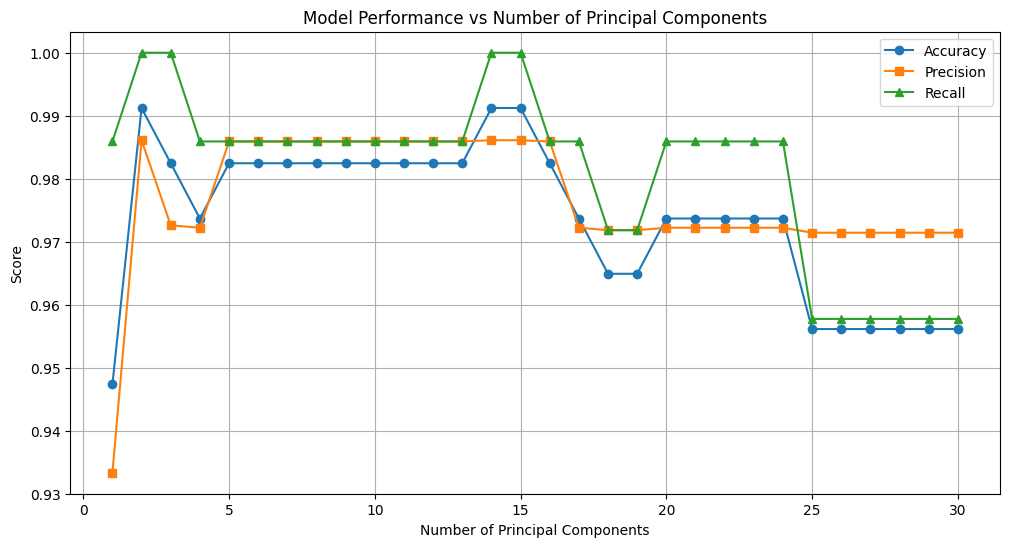

Optimal number of components: 2
Best accuracy: 0.9912


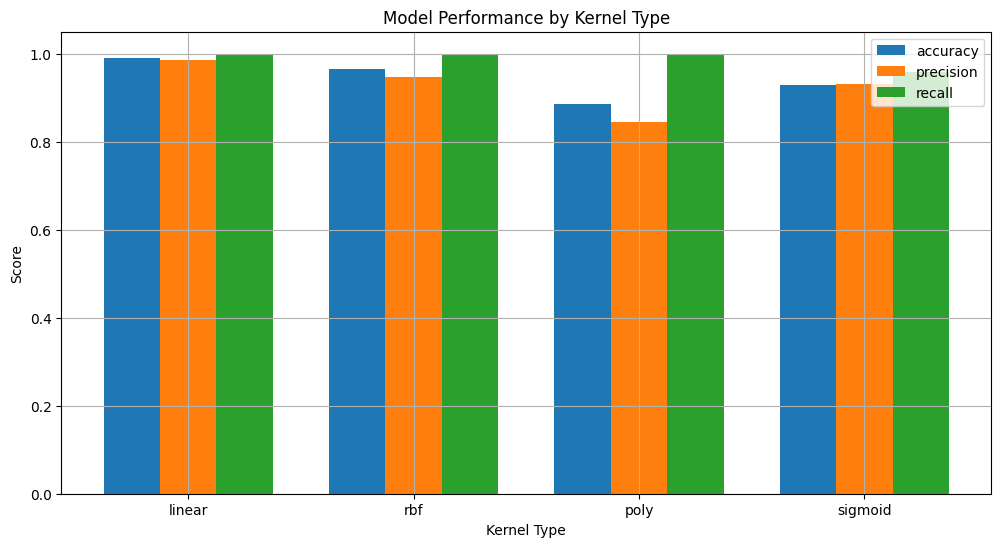


Kernel comparison results:
    kernel  accuracy  precision    recall
0   linear  0.991228   0.986111  1.000000
1      rbf  0.964912   0.946667  1.000000
2     poly  0.885965   0.845238  1.000000
3  sigmoid  0.929825   0.931507  0.957746


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


def prepare_data():
    # Load cancer dataset
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test


def evaluate_pca_components(X_train, X_test, y_train, y_test, max_components=30):
    results = []
    
    for n in range(1, max_components + 1):
        # Apply PCA
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Train SVM
        svm = SVC(kernel='linear')
        svm.fit(X_train_pca, y_train)
        
        # Make predictions
        y_pred = svm.predict(X_test_pca)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        results.append({
            'n_components': n,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        })
    
    return pd.DataFrame(results)

# 3. Compare different kernels
def compare_kernels(X_train, X_test, y_train, y_test, best_n_components):
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    kernel_results = []
    
    # Apply PCA with best number of components
    pca = PCA(n_components=best_n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    for kernel in kernels:
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)
        y_pred = svm.predict(X_test_pca)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        kernel_results.append({
            'kernel': kernel,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        })
    
    return pd.DataFrame(kernel_results)

# 4. Plot results
def plot_pca_results(results):
    plt.figure(figsize=(12, 6))
    plt.plot(results['n_components'], results['accuracy'], label='Accuracy', marker='o')
    plt.plot(results['n_components'], results['precision'], label='Precision', marker='s')
    plt.plot(results['n_components'], results['recall'], label='Recall', marker='^')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Score')
    plt.title('Model Performance vs Number of Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_kernel_results(kernel_results):
    metrics = ['accuracy', 'precision', 'recall']
    x = np.arange(len(kernel_results['kernel']))
    width = 0.25
    
    plt.figure(figsize=(12, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i*width, kernel_results[metric], width, label=metric)
    
    plt.xlabel('Kernel Type')
    plt.ylabel('Score')
    plt.title('Model Performance by Kernel Type')
    plt.xticks(x + width, kernel_results['kernel'])
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
def main():
    # Prepare data
    X_train, X_test, y_train, y_test = prepare_data()
    
    # Evaluate different numbers of components
    results = evaluate_pca_components(X_train, X_test, y_train, y_test)
    plot_pca_results(results)
    
    # Find optimal number of components
    best_n_components = results.loc[results['accuracy'].idxmax(), 'n_components']
    print(f"Optimal number of components: {best_n_components}")
    print(f"Best accuracy: {results['accuracy'].max():.4f}")
    
    # Compare different kernels
    kernel_results = compare_kernels(X_train, X_test, y_train, y_test, best_n_components)
    plot_kernel_results(kernel_results)
    print("\nKernel comparison results:")
    print(kernel_results)

if __name__ == "__main__":
    main()

Comparing different kernels with grid search optimization:

Training linear kernel...


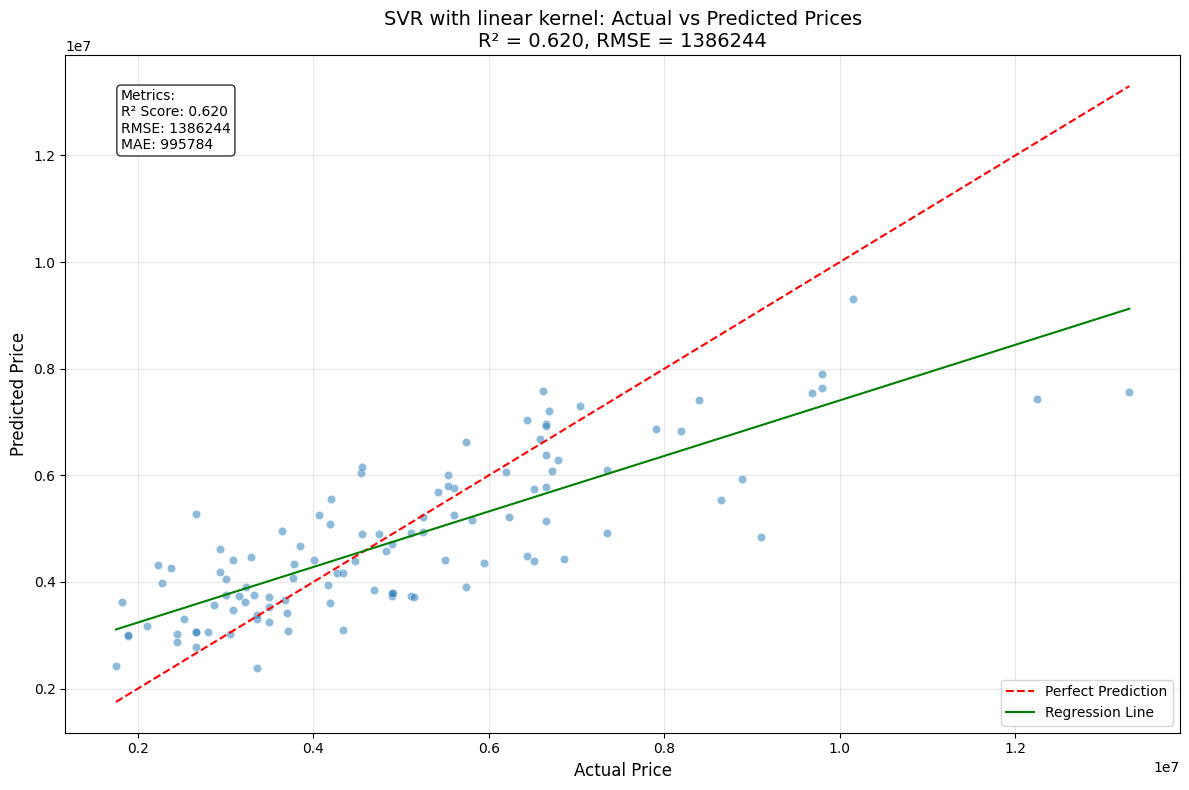


Training rbf kernel...


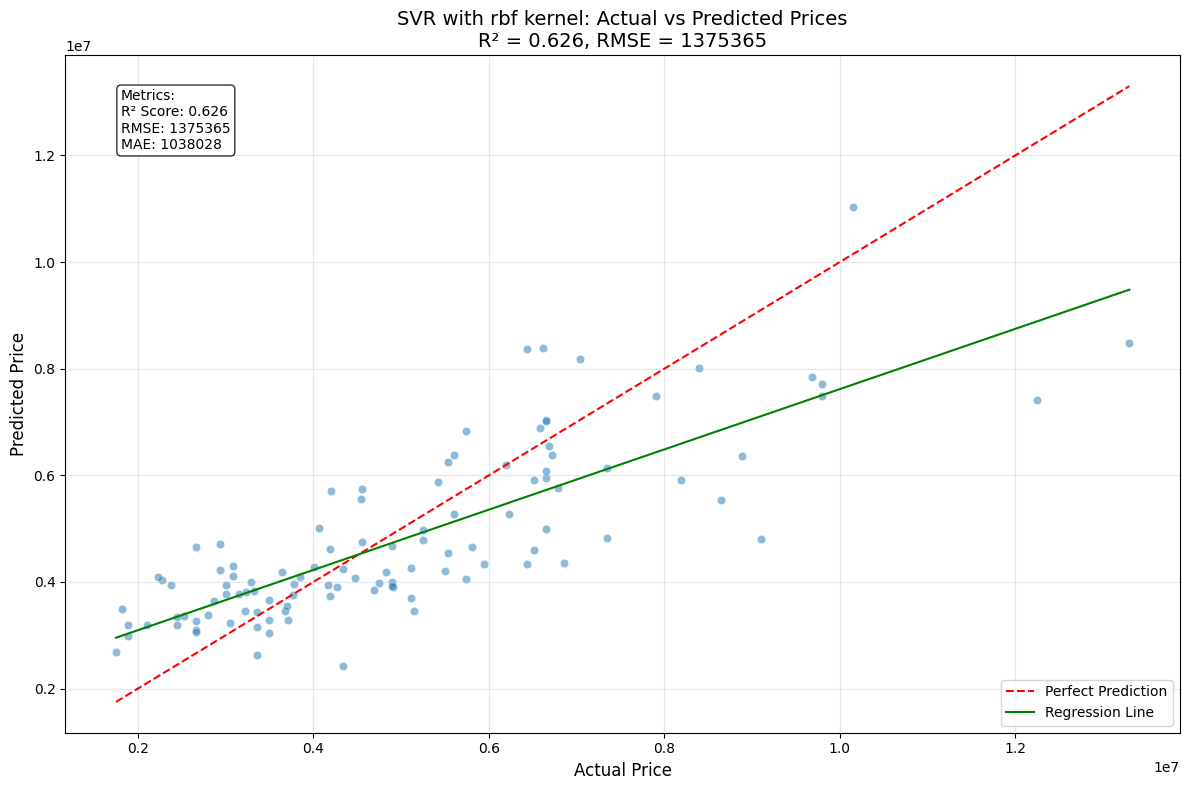


Training poly kernel...


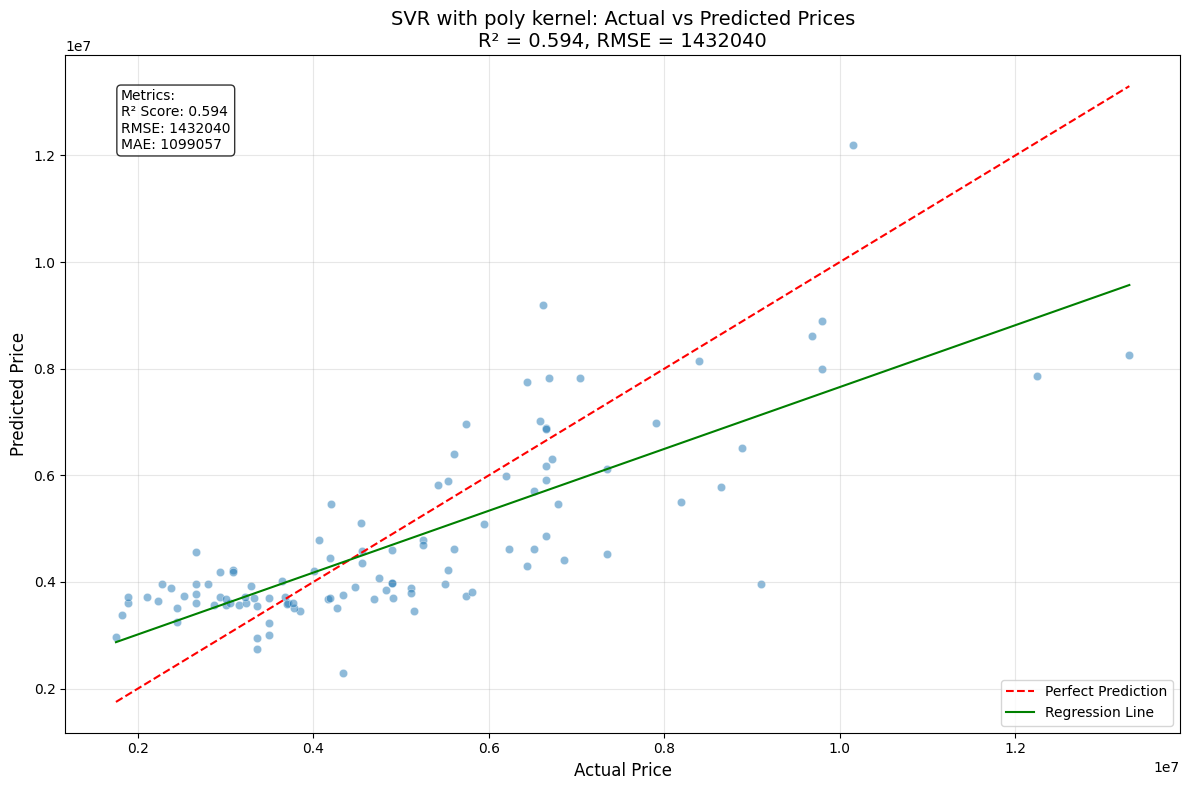


Training sigmoid kernel...


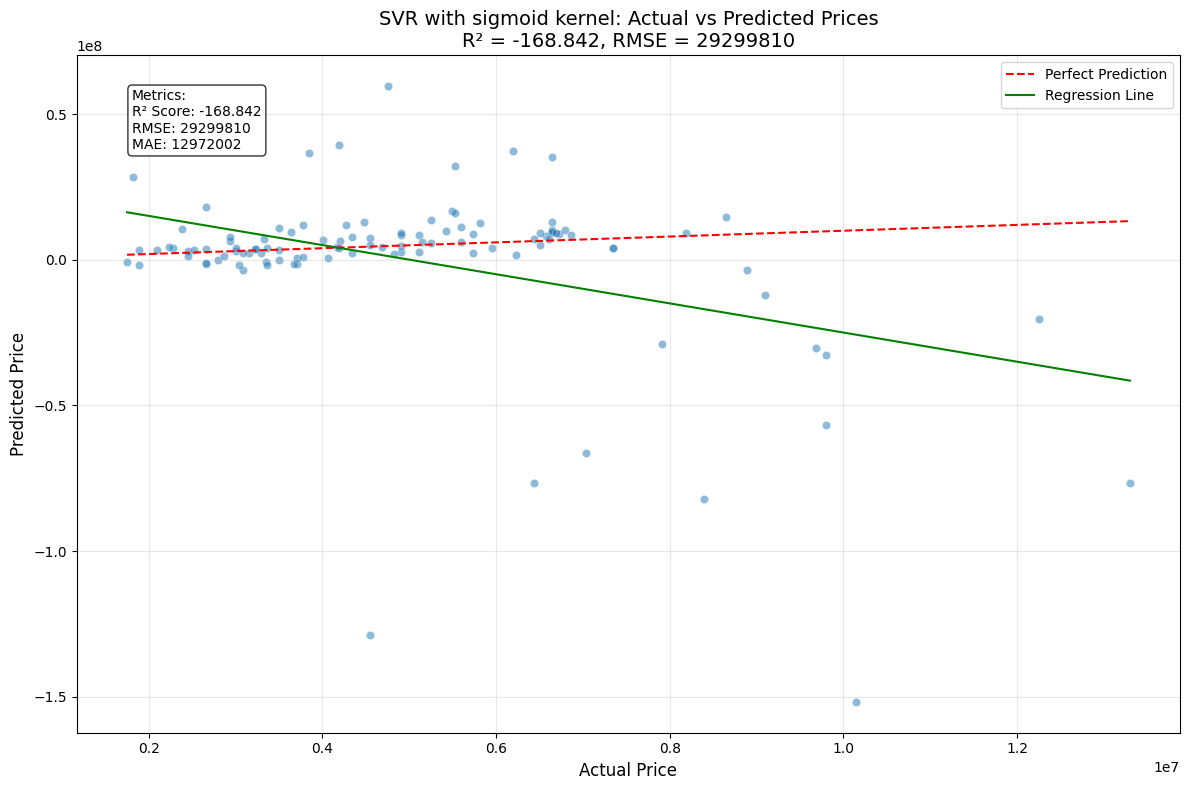


Kernel Comparison Results:
 kernel          mse         rmse          mae       r2                                             best_params
 linear 1.921673e+12  1386244.056   995784.207    0.620                                {'C': 1, 'epsilon': 0.1}
    rbf 1.891630e+12  1375365.384  1038028.145    0.626               {'C': 100, 'epsilon': 0.1, 'gamma': 0.01}
   poly 2.050737e+12  1432039.625  1099056.800    0.594 {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto'}
sigmoid 8.584789e+14 29299810.323 12972001.896 -168.842             {'C': 10, 'epsilon': 0.01, 'gamma': 'auto'}


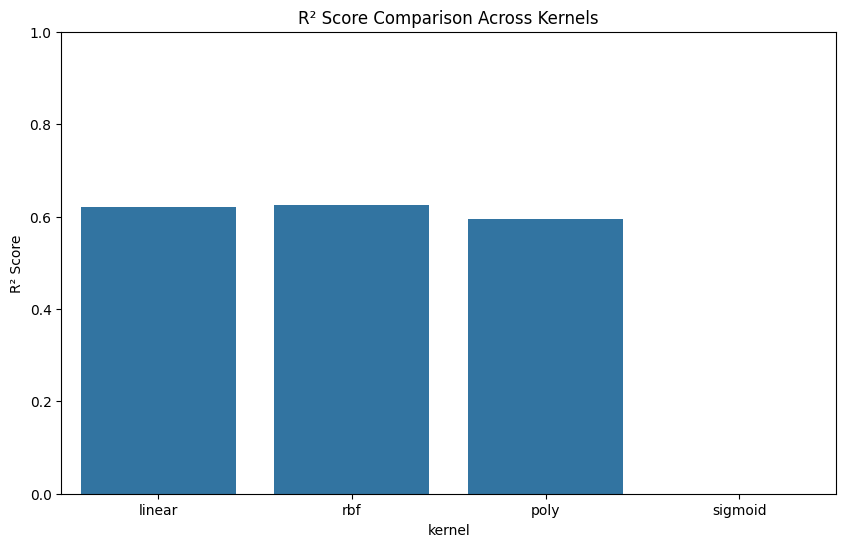

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

def improved_svr_model(X_train, X_test, y_train, y_test, kernel='rbf'):
    """Train SVR with grid search and robust scaling"""
    # Use RobustScaler for better handling of outliers
    scaler_X = RobustScaler()
    scaler_y = RobustScaler()
    
    # Scale features
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    # Scale target
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
    
    # Define parameter grid for each kernel
    param_grids = {
        'rbf': {
            'C': [10, 100, 1000],
            'gamma': ['scale', 'auto', 0.1, 0.01],
            'epsilon': [0.1, 0.01, 0.001]
        },
        'linear': {
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.01, 0.001]
        },
        'poly': {
            'C': [10, 100],
            'degree': [2, 3],
            'gamma': ['scale', 'auto'],
            'epsilon': [0.1, 0.01]
        },
        'sigmoid': {
            'C': [10, 100],
            'gamma': ['scale', 'auto'],
            'epsilon': [0.1, 0.01]
        }
    }
    
    # Create base SVR model
    svr = SVR(kernel=kernel)
    
    # Perform grid search
    grid_search = GridSearchCV(
        svr,
        param_grids[kernel],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit model
    grid_search.fit(X_train_scaled, y_train_scaled)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred_scaled = best_model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot results with improved visualization
    plt.figure(figsize=(12, 8))
    
    # Create scatter plot
    sns.scatterplot(x=y_test, y=y_pred.ravel(), alpha=0.5)
    
    # Add perfect prediction line
    line_x = np.linspace(y_test.min(), y_test.max(), 100)
    plt.plot(line_x, line_x, 'r--', label='Perfect Prediction')
    
    # Add regression line
    z = np.polyfit(y_test, y_pred.ravel(), 1)
    p = np.poly1d(z)
    plt.plot(line_x, p(line_x), 'g-', label='Regression Line')
    
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    plt.title(f'SVR with {kernel} kernel: Actual vs Predicted Prices\nR² = {r2:.3f}, RMSE = {rmse:.0f}', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add text box with metrics
    metrics_text = f'Metrics:\nR² Score: {r2:.3f}\nRMSE: {rmse:.0f}\nMAE: {mae:.0f}'
    plt.text(0.05, 0.95, metrics_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'best_params': grid_search.best_params_
    }

def compare_improved_kernels(X_train, X_test, y_train, y_test):
    """Compare different kernels with grid search optimization"""
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    results = []
    
    for kernel in kernels:
        print(f"\nTraining {kernel} kernel...")
        metrics = improved_svr_model(X_train, X_test, y_train, y_test, kernel)
        results.append({
            'kernel': kernel,
            'mse': metrics['mse'],
            'rmse': metrics['rmse'],
            'mae': metrics['mae'],
            'r2': metrics['r2'],
            'best_params': metrics['best_params']
        })
    
    # Create results DataFrame with better formatting
    df_results = pd.DataFrame(results)
    df_results = df_results.round(3)
    return df_results

def main_improved(file_path):
    """Main function with improved data preparation and analysis"""
    # Load and prepare data
    try:
        df = pd.read_csv(file_path)
        
        # Convert categorical variables
        categorical_cols = ['mainroad', 'guestroom', 'basement', 
                          'hotwaterheating', 'airconditioning', 'prefarea']
        for col in categorical_cols:
            df[col] = df[col].map({'yes': 1, 'no': 0})
        
        # Separate features and target
        X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                'parking', 'prefarea']]
        y = df['price']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Compare kernels
        print("Comparing different kernels with grid search optimization:")
        results = compare_improved_kernels(X_train, X_test, y_train, y_test)
        
        # Display results in a formatted table
        print("\nKernel Comparison Results:")
        print(results.to_string(index=False))
        
        # Plot comparison of R² scores
        plt.figure(figsize=(10, 6))
        sns.barplot(x='kernel', y='r2', data=results)
        plt.title('R² Score Comparison Across Kernels')
        plt.ylabel('R² Score')
        plt.ylim(0, 1)
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    file_path = 'assets/Housing.csv'
    main_improved(file_path)

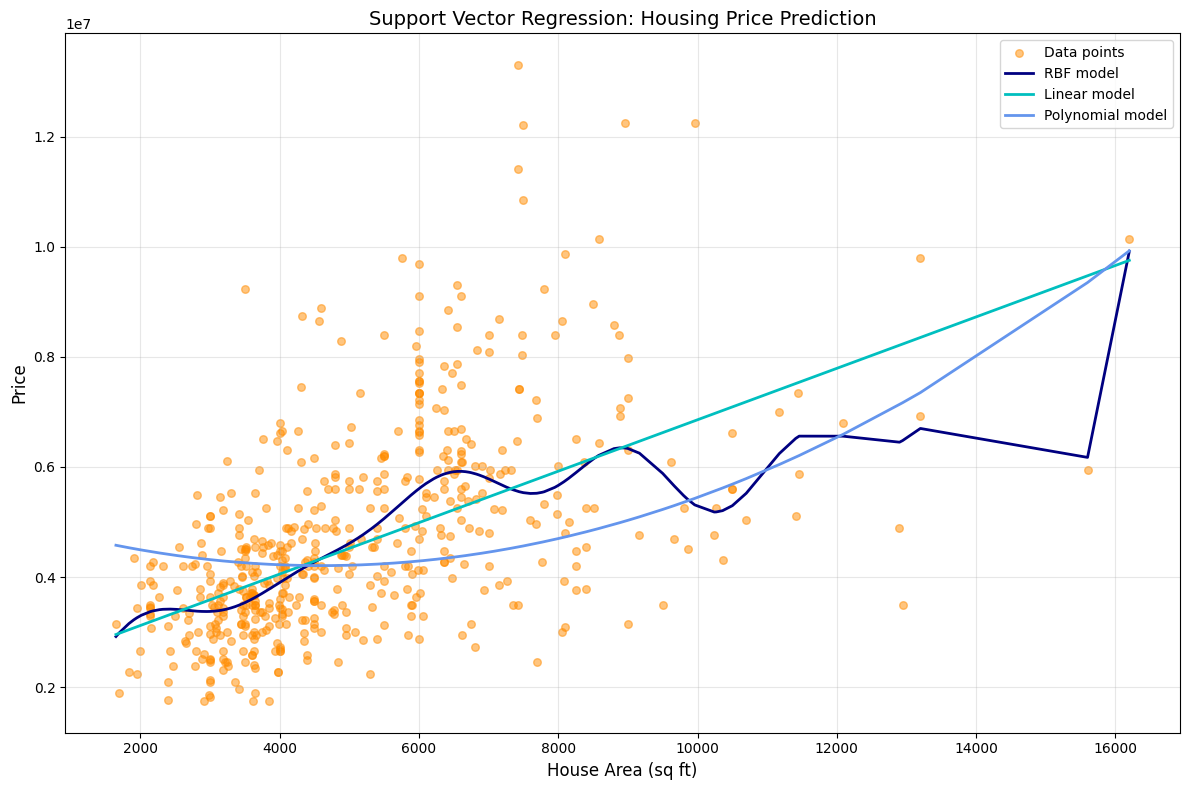

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

def prepare_data(file_path):
    """Load and prepare the housing dataset"""
    # Load data
    df = pd.read_csv(file_path)
    
    # Convert categorical variables
    categorical_cols = ['mainroad', 'guestroom', 'basement', 
                       'hotwaterheating', 'airconditioning', 'prefarea']
    for col in categorical_cols:
        df[col] = df[col].map({'yes': 1, 'no': 0})
    
    # For visualization, we'll use 'area' as our X feature
    X = df[['area']].values
    y = df['price'].values
    
    return X, y

def plot_svr_comparison(X, y):
    """Create comparison plot of different SVR kernels"""
    # Scale the features
    scaler_X = RobustScaler()
    scaler_y = RobustScaler()
    
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
    
    # Sort X and y for smooth plotting
    sort_idx = np.argsort(X_scaled.ravel())
    X_sorted = X_scaled[sort_idx]
    y_sorted = y_scaled[sort_idx]
    
    # Create and train SVR models
    svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
    svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)
    svr_poly = SVR(kernel='poly', C=100, degree=2, gamma='scale', epsilon=0.1)
    
    # Fit models and make predictions
    y_rbf = svr_rbf.fit(X_sorted, y_sorted).predict(X_sorted)
    y_lin = svr_lin.fit(X_sorted, y_sorted).predict(X_sorted)
    y_poly = svr_poly.fit(X_sorted, y_sorted).predict(X_sorted)
    
    # Convert back to original scale for plotting
    X_plot = scaler_X.inverse_transform(X_sorted)
    y_plot = scaler_y.inverse_transform(y_sorted.reshape(-1, 1))
    y_rbf_plot = scaler_y.inverse_transform(y_rbf.reshape(-1, 1))
    y_lin_plot = scaler_y.inverse_transform(y_lin.reshape(-1, 1))
    y_poly_plot = scaler_y.inverse_transform(y_poly.reshape(-1, 1))
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot the actual data points
    plt.scatter(X_plot, y_plot, color='darkorange', label='Data points', 
                alpha=0.5, s=30)
    
    # Plot the predictions
    lw = 2
    plt.plot(X_plot, y_rbf_plot, color='navy', lw=lw, label='RBF model')
    plt.plot(X_plot, y_lin_plot, color='c', lw=lw, label='Linear model')
    plt.plot(X_plot, y_poly_plot, color='cornflowerblue', lw=lw, 
             label='Polynomial model')
    
    # Customize the plot
    plt.xlabel('House Area (sq ft)', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.title('Support Vector Regression: Housing Price Prediction', fontsize=14)
    plt.legend(fontsize=10)
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Return models for potential further use
    return svr_rbf, svr_lin, svr_poly

def main():
    """Main function to run the analysis"""
    try:
        # Load and prepare data
        X, y = prepare_data('assets/Housing.csv')
        
        # Create comparison plot
        models = plot_svr_comparison(X, y)
        
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

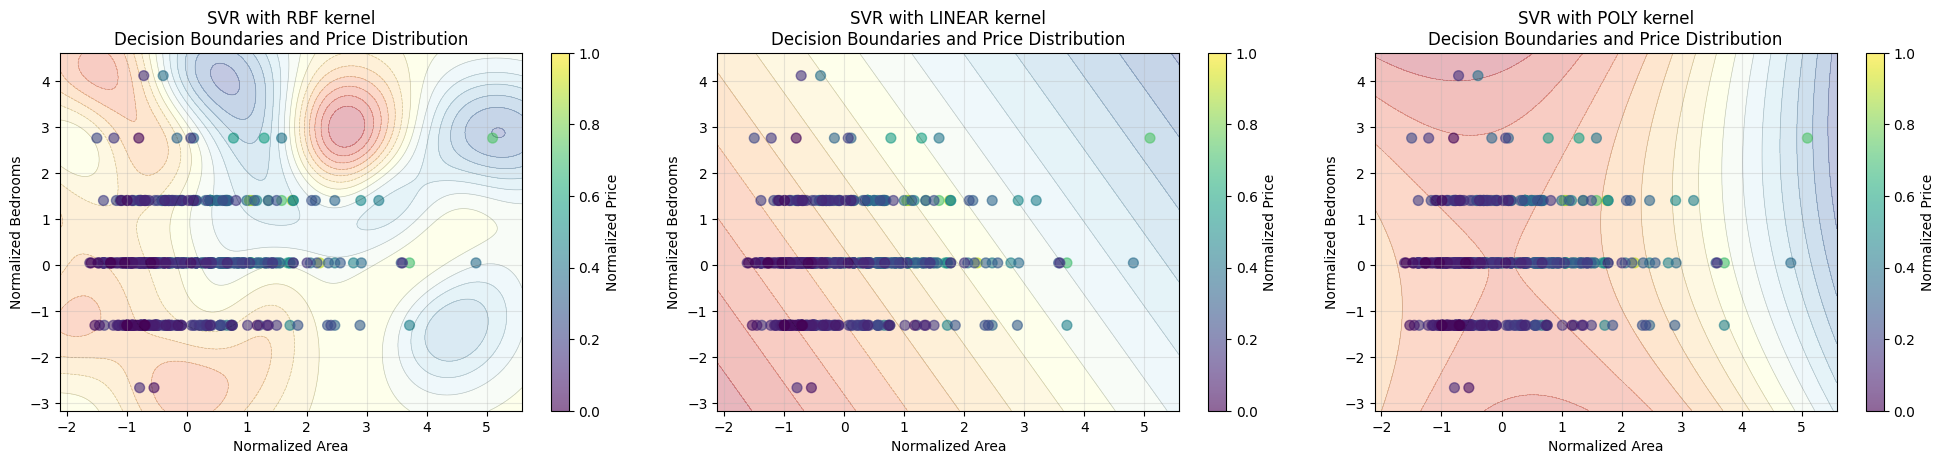

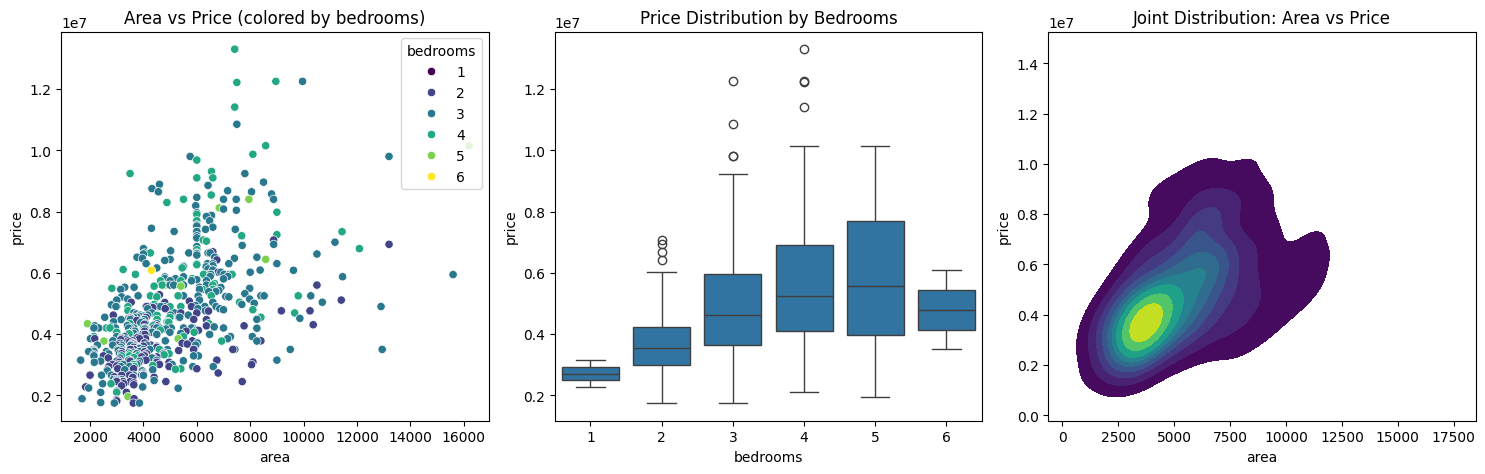

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data_for_visualization(file_path):
    """Load and prepare the housing dataset for enhanced visualization"""
    # Load data
    df = pd.read_csv(file_path)
    
    # Convert categorical variables
    categorical_cols = ['mainroad', 'guestroom', 'basement', 
                       'hotwaterheating', 'airconditioning', 'prefarea']
    for col in categorical_cols:
        df[col] = df[col].map({'yes': 1, 'no': 0})
    
    # Select two most important features for visualization
    X = df[['area', 'bedrooms']].values
    y = df['price'].values
    
    return X, y, df

def plot_svr_with_boundaries(X, y, df):
    """Create enhanced comparison plot with decision boundaries"""
    # Scale the features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
    
    # Create mesh grid for decision boundary
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Create and train SVR models
    kernels = ['rbf', 'linear', 'poly']
    colors = ['navy', 'c', 'cornflowerblue']
    
    plt.figure(figsize=(20, 5))
    
    for idx, (kernel, color) in enumerate(zip(kernels, colors)):
        plt.subplot(1, 3, idx + 1)
        
        # Train SVR model
        if kernel == 'poly':
            svr = SVR(kernel=kernel, C=100, degree=2, gamma='scale', epsilon=0.1)
        else:
            svr = SVR(kernel=kernel, C=100, gamma='scale', epsilon=0.1)
            
        svr.fit(X_scaled, y_scaled)
        
        # Create color map based on predictions
        Z = svr.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        plt.contourf(xx, yy, Z, levels=15, cmap=plt.cm.RdYlBu, alpha=0.3)
        plt.contour(xx, yy, Z, levels=15, colors='k', alpha=0.2, linewidths=0.5)
        
        # Create scatter plot colored by price ranges
        price_normalized = (y - y.min()) / (y.max() - y.min())
        scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                            c=price_normalized, 
                            cmap='viridis',
                            s=50, alpha=0.6,
                            label='Data points')
        
        # Customize the plot
        plt.colorbar(scatter, label='Normalized Price')
        plt.xlabel('Normalized Area')
        plt.ylabel('Normalized Bedrooms')
        plt.title(f'SVR with {kernel.upper()} kernel\nDecision Boundaries and Price Distribution')
        
        # Add grid
        plt.grid(True, alpha=0.3)
        
    plt.tight_layout(pad=2.0)
    plt.show()
    
    # Create additional visualization for price relationships
    plt.figure(figsize=(15, 5))
    
    # Plot area vs price
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x='area', y='price', hue='bedrooms', palette='viridis')
    plt.title('Area vs Price (colored by bedrooms)')
    
    # Plot bedrooms vs price
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='bedrooms', y='price')
    plt.title('Price Distribution by Bedrooms')
    
    # Plot joint distribution
    plt.subplot(1, 3, 3)
    sns.kdeplot(data=df, x='area', y='price', cmap='viridis', fill=True)
    plt.title('Joint Distribution: Area vs Price')
    
    plt.tight_layout()
    plt.show()

def main():
    """Main function to run the analysis"""
    try:
        # Load and prepare data
        X, y, df = prepare_data_for_visualization('assets/Housing.csv')
        
        # Create comparison plots
        plot_svr_with_boundaries(X, y, df)
        
    except Exception as e:
        print(f"Error: {str(e)}")
        raise e

if __name__ == "__main__":
    main()